In [12]:
import keras
keras.__version__

'2.1.6'

In [13]:
import os, shutil

In [14]:
base_dir = 'simpsons'

In [15]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Training
train_bart_dir = os.path.join(train_dir, 'bart')
validation_bart_dir = os.path.join(validation_dir, 'bart')
test_bart_dir = os.path.join(test_dir, 'bart')

# Same split for homer
train_homer_dir = os.path.join(train_dir, 'homer')
validation_homer_dir = os.path.join(validation_dir, 'homer')
test_homer_dir = os.path.join(test_dir, 'homer')

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2146 images belonging to 2 classes.
Found 1442 images belonging to 2 classes.


In [17]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [14]:
!conda install -c anaconda pil --y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/ubuntu/anaconda3/envs/tensorflow_p27

  added / updated specs: 
    - pil


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fontconfig-2.11.1          |                6         405 KB  anaconda
    pandas-0.21.1              |   py27h38cdd7d_0        10.5 MB  anaconda
    freetype-2.5.5             |                2         2.5 MB  anaconda
    pango-1.39.0               |                0         777 KB  anaconda
    numpy-1.11.3               |   py27h3dfced4_4         3.5 MB  anaconda
    cairo-1.12.18              |                6         594 KB  anaconda
    harfbuzz-0.9.39            |                1         1.1 MB  anaconda
    libt

In [27]:
!conda install -c anaconda pillow --y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/ubuntu/anaconda3/envs/tensorflow_p27

  added / updated specs: 
    - pillow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pillow-3.4.2               |           py27_0         852 KB  anaconda

The following NEW packages will be INSTALLED:

    pillow: 3.4.2-py27_0 anaconda


pillow 3.4.2: ########################################################## | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


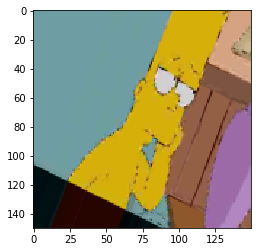

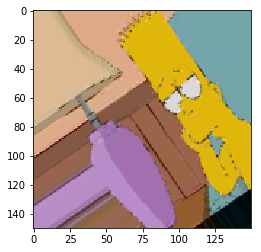

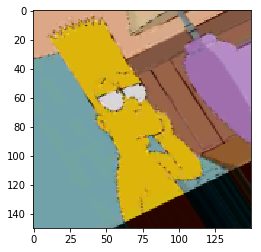

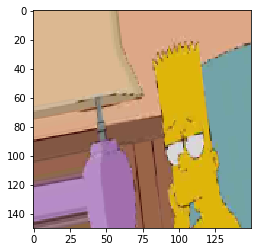

In [8]:
%matplotlib inline  
import matplotlib.pyplot as plt
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_bart_dir, fname) for fname in os.listdir(train_bart_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [18]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten, Dropout, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 15, 15, 128)       147584    
__________

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2146 images belonging to 2 classes.
Found 1442 images belonging to 2 classes.


The epochs below are actually after my first attempt at fitting with 100 epochs. After about 20 epochs he accuracy was already nearing 90%, so instead of running this for too long I decided to break the run up into 20 epoch intervals.

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 84s 836ms/step - loss: 0.1905 - acc: 0.9250 - val_loss: 0.2739 - val_acc: 0.8960
Epoch 2/20
100/100 [==============================] - 83s 830ms/step - loss: 0.1732 - acc: 0.9273 - val_loss: 0.3264 - val_acc: 0.8680
Epoch 3/20
100/100 [==============================] - 84s 843ms/step - loss: 0.1675 - acc: 0.9328 - val_loss: 0.6286 - val_acc: 0.7610
Epoch 4/20
100/100 [==============================] - 83s 834ms/step - loss: 0.1508 - acc: 0.9435 - val_loss: 0.3070 - val_acc: 0.8900
Epoch 5/20
100/100 [==============================] - 82s 824ms/step - loss: 0.1525 - acc: 0.9390 - val_loss: 0.3461 - val_acc: 0.8740
Epoch 6/20
100/100 [==============================] - 83s 828ms/step - loss: 0.1283 - acc: 0.9580 - val_loss: 0.5311 - val_acc: 0.8280
Epoch 7/20
100/100 [==============================] - 83s 825ms/step - loss: 0.1158 - acc: 0.9545 - val_loss: 0.5345 - val_acc: 0.8110
Epoch 8/20
100/100 [==============================] - 8

In [15]:
model.save('bart_vs_homer_init.h5')

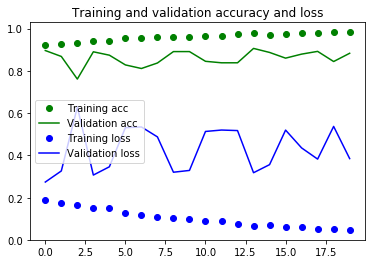

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc', color = 'green')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color = 'green')
plt.plot(epochs, loss, 'bo', label='Training loss', color = 'blue')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'blue')
plt.title('Training and validation accuracy and loss')
plt.legend()

plt.show()

(1, 150, 150, 3)


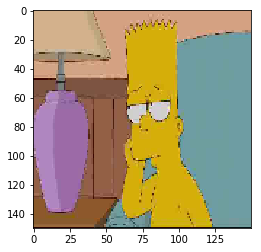

In [21]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(fnames[3], target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

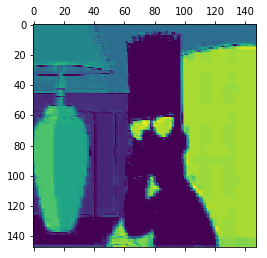

In [26]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide


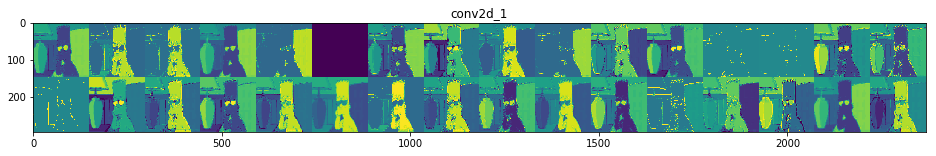

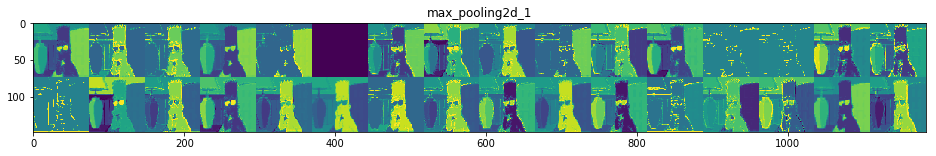

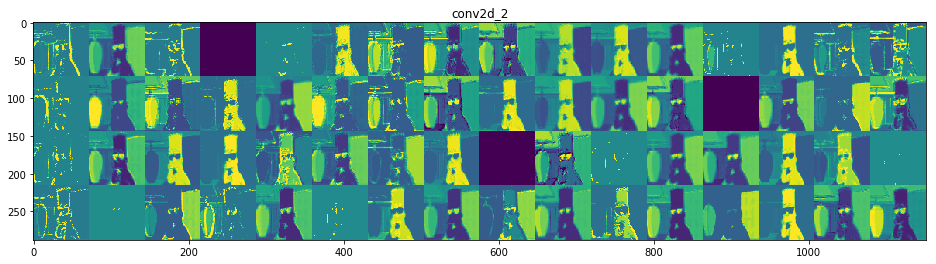

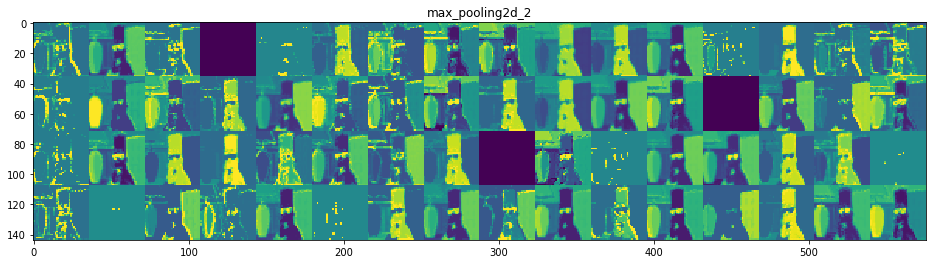

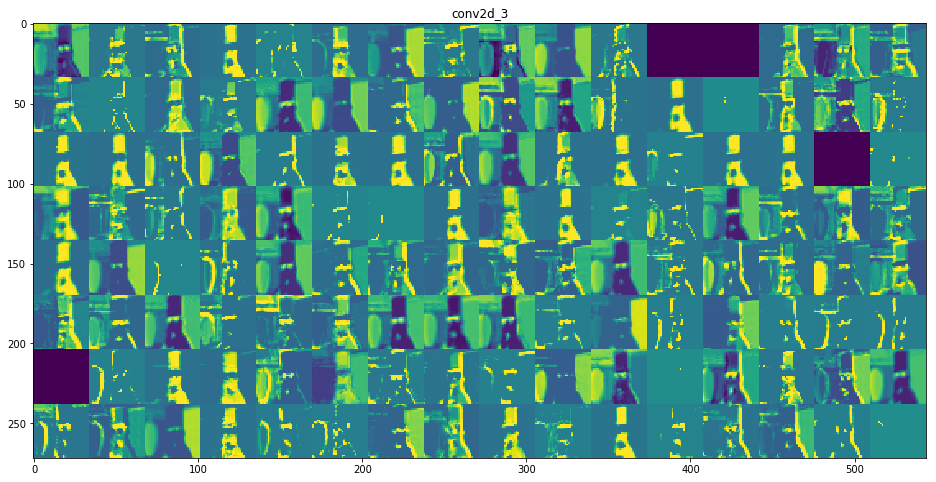

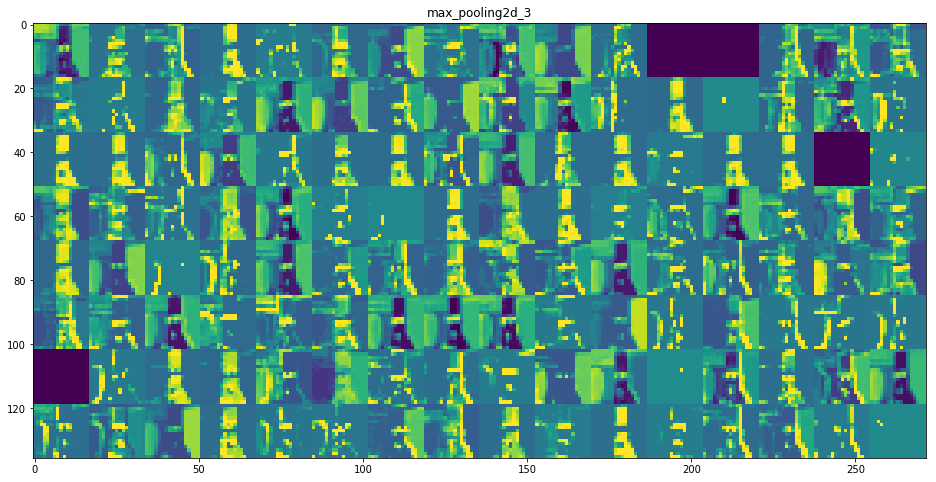

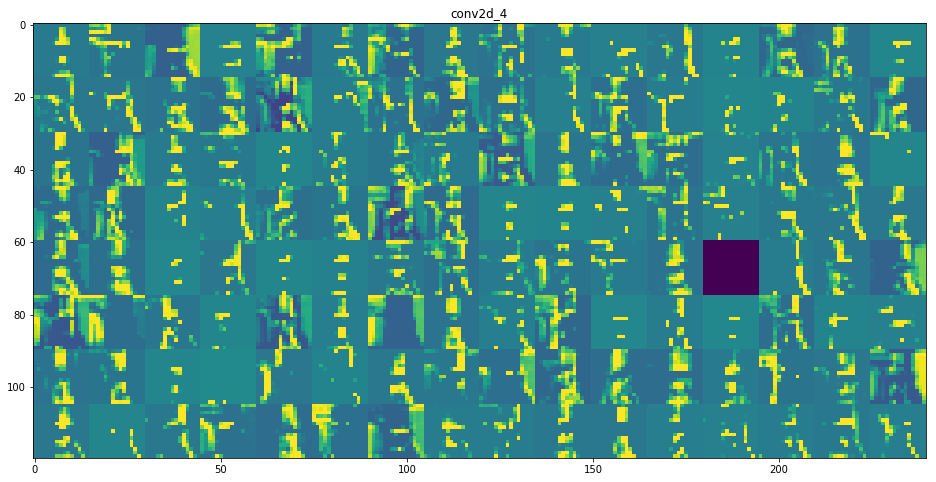

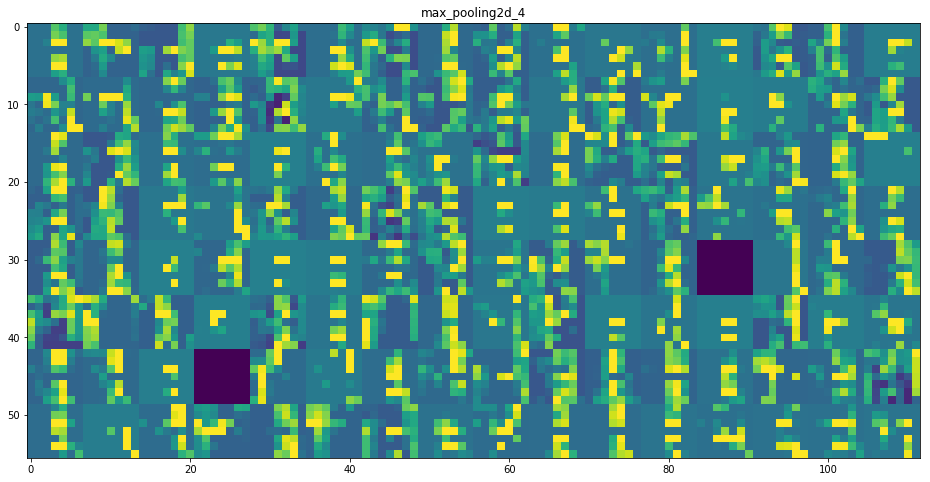

In [27]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    

In [38]:
# see prediction for Bart
fnames = [os.path.join(train_bart_dir, fname) for fname in os.listdir(train_bart_dir)]
img = image.load_img(fnames[2], target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
model.predict(x)

array([[0.]], dtype=float32)

In [39]:
# see prediction for Homer
fnames = [os.path.join(train_homer_dir, fname) for fname in os.listdir(train_homer_dir)]
img = image.load_img(fnames[2], target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
model.predict(x)

array([1.], dtype=float32)

In [21]:
del model.layers[-1:]

In [22]:
model.add(Dense(1, activation='softmax'))

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 15, 15, 128)       147584    
__________

In [25]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      shuffle = True)

Epoch 1/10
100/100 [==============================] - 121s 1s/step - loss: 7.9612 - acc: 0.5006 - val_loss: 2.9854 - val_acc: 0.8127
Epoch 2/10
100/100 [==============================] - 116s 1s/step - loss: 7.9961 - acc: 0.4984 - val_loss: 2.9245 - val_acc: 0.8166
Epoch 3/10
100/100 [==============================] - 118s 1s/step - loss: 8.0551 - acc: 0.4947 - val_loss: 2.9143 - val_acc: 0.8172
Epoch 4/10
100/100 [==============================] - 118s 1s/step - loss: 7.9854 - acc: 0.4991 - val_loss: 2.9448 - val_acc: 0.8153
Epoch 5/10
100/100 [==============================] - 118s 1s/step - loss: 8.0950 - acc: 0.4922 - val_loss: 2.9346 - val_acc: 0.8159
Epoch 6/10
100/100 [==============================] - 116s 1s/step - loss: 7.8964 - acc: 0.5047 - val_loss: 2.9955 - val_acc: 0.8121
Epoch 7/10
100/100 [==============================] - 117s 1s/step - loss: 8.1747 - acc: 0.4872 - val_loss: 2.9549 - val_acc: 0.8146
Epoch 8/10
100/100 [==============================] - 118s 1s/step - 

In [26]:
model.save('bart_vs_homer_softmax.h5')

In [36]:
model = load_model('bart_vs_homer_init.h5')

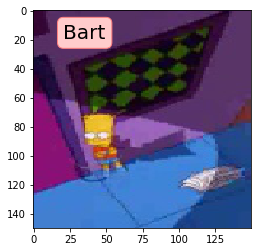

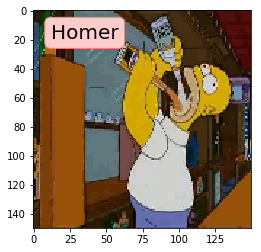

In [69]:
%matplotlib inline  
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
# see prediction for Bart
fnames = [os.path.join(test_bart_dir, fname) for fname in os.listdir(test_bart_dir)]
img = image.load_img(fnames[2], target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
pred = model.predict(x)
label = "Homer" if pred == 1 else "Bart"
plt.imshow(img)
plt.text(35, 15, label, size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.show()
# see prediction for Homer
fnames = [os.path.join(train_homer_dir, fname) for fname in os.listdir(train_homer_dir)]
img = image.load_img(fnames[2], target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
pred = model.predict(x)
label = "Homer" if pred == 1 else "Bart"
plt.imshow(img)
plt.text(35, 15, label, size=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.show()

In [70]:
def bart_or_homer(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    pred = model.predict(x)
    label = "Homer" if pred == 1 else "Bart"
    plt.imshow(img)
    plt.text(35, 15, label, size=20,
             ha="center", va="center",
             bbox=dict(boxstyle="round",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8),
                       )
             )
    plt.show()

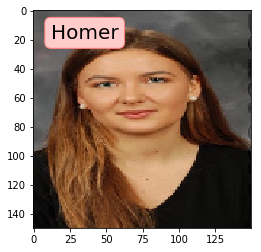

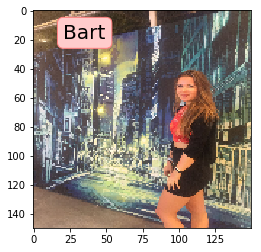

In [72]:
bart_or_homer('picture1.jpg')
bart_or_homer('picture2.jpg')

In [75]:
from keras import backend as K
from keras.applications.vgg19 import VGG19

K.clear_session()
model = VGG19(weights='imagenet')

574717952/574710816 [==============================] - 16s 0us/step


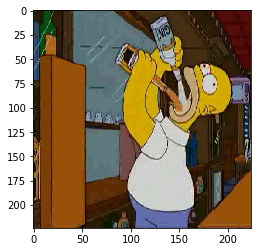

In [89]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions
import numpy as np


fnames = [os.path.join(train_homer_dir, fname) for fname in os.listdir(train_homer_dir)]
img = image.load_img(fnames[2], target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)
plt.show()

In [90]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02787622', 'banjo', 0.25983566), ('n02676566', 'acoustic_guitar', 0.24454176), ('n03272010', 'electric_guitar', 0.22924863)]


In [102]:
from keras.preprocessing.image import load_img, img_to_array

# This is the path to the image you want to transform.
target_image_path = 'picture1.jpg'
# This is the path to the style image.
style_reference_image_path = 'simpsons/train/bart/pic_0009.jpg'

# Dimensions of the generated picture.
width, height = load_img(target_image_path).size
img_height = 400
img_width = int(width * img_height / height)

In [104]:
import numpy as np
from keras.applications import inception_resnet_v2

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_resnet_v2.preprocess_input(img)
    return img

def deprocess_image(x):
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [106]:
from keras import backend as K

target_image = K.constant(preprocess_image(target_image_path))
style_reference_image = K.constant(preprocess_image(style_reference_image_path))

# This placeholder will contain our generated image
combination_image = K.placeholder((1, img_height, img_width, 3))

# We combine the 3 images into a single batch
input_tensor = K.concatenate([target_image,
                              style_reference_image,
                              combination_image], axis=0)

# We build the InceptionResNetV2 network with our batch of 3 images as input.
# The model will be loaded with pre-trained ImageNet weights.
model = inception_resnet_v2.InceptionResNetV2(input_tensor=input_tensor,
                                              weights='imagenet',
                                              include_top=False)
print('Model loaded.')

Model loaded.


In [107]:
def content_loss(base, combination):
    return K.sum(K.square(combination - base))

def gram_matrix(x):
    features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
    gram = K.dot(features, K.transpose(features))
    return gram

def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_height * img_width
    return K.sum(K.square(S - C)) / (4. * (channels ** 2) * (size ** 2))

def total_variation_loss(x):
    a = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, 1:, :img_width - 1, :])
    b = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, :img_height - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

In [114]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_201 (Conv2D)             (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_201 (BatchN (None, None, None, 3 96          conv2d_201[0][0]                 
__________________________________________________________________________________________________
activation_200 (Activation)     (None, None, None, 3 0           batch_normalization_201[0][0]    
__________________________________________________________________________________________________
conv2d_202

In [115]:
# Dict mapping layer names to activation tensors
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
# Name of layer used for content loss
content_layer = 'block8_10_conv'
# Name of layers used for style loss
style_layers = ['block8_3_conv',
                'block8_5_conv',
                'block8_7_conv',
                'block8_9_conv']
# Weights in the weighted average of the loss components
total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

# Define the loss by adding all components to a `loss` variable
loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss += content_weight * content_loss(target_image_features,
                                      combination_features)
for layer_name in style_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(style_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)

In [116]:
# Get the gradients of the generated image wrt the loss
grads = K.gradients(loss, combination_image)[0]

# Function to fetch the values of the current loss and the current gradients
fetch_loss_and_grads = K.function([combination_image], [loss, grads])


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        x = x.reshape((1, img_height, img_width, 3))
        outs = fetch_loss_and_grads([x])
        loss_value = outs[0]
        grad_values = outs[1].flatten().astype('float64')
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

In [117]:
from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave
import time

result_prefix = 'style_transfer_result'
iterations = 20

# Run scipy-based optimization (L-BFGS) over the pixels of the generated image
# so as to minimize the neural style loss.
# This is our initial state: the target image.
# Note that `scipy.optimize.fmin_l_bfgs_b` can only process flat vectors.
x = preprocess_image(target_image_path)
x = x.flatten()
for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x,
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # Save current generated image
    img = x.copy().reshape((img_height, img_width, 3))
    img = deprocess_image(img)
    fname = result_prefix + '_at_iteration_%d.png' % i
    imsave(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0


KeyboardInterrupt: 

In [119]:
from keras.applications import vgg16

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg16.preprocess_input(img)
    return img

# We build the InceptionResNetV2 network with our batch of 3 images as input.
# The model will be loaded with pre-trained ImageNet weights.
model = vgg16.VGG16(input_tensor=input_tensor,
                                              weights='imagenet',
                                              include_top=False)
print('Model loaded.')

58892288/58889256 [==============================] - 1s 0us/step
Model loaded.


In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [121]:
# Dict mapping layer names to activation tensors
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
# Name of layer used for content loss
content_layer = 'block5_conv3'
# Name of layers used for style loss
style_layers = ['block1_conv2',
                'block2_conv1',
                'block2_conv2',
                'block3_conv1',
                'block4_conv2',
                'block5_conv1',]
# Weights in the weighted average of the loss components
total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

# Define the loss by adding all components to a `loss` variable
loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss += content_weight * content_loss(target_image_features,
                                      combination_features)
for layer_name in style_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(style_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)

In [123]:
# Get the gradients of the generated image wrt the loss
grads = K.gradients(loss, combination_image)[0]

# Function to fetch the values of the current loss and the current gradients
fetch_loss_and_grads = K.function([combination_image], [loss, grads])


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        x = x.reshape((1, img_height, img_width, 3))
        outs = fetch_loss_and_grads([x])
        loss_value = outs[0]
        grad_values = outs[1].flatten().astype('float64')
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

In [124]:
from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave
import time

result_prefix = 'style_transfer_result'
iterations = 20

# Run scipy-based optimization (L-BFGS) over the pixels of the generated image
# so as to minimize the neural style loss.
# This is our initial state: the target image.
# Note that `scipy.optimize.fmin_l_bfgs_b` can only process flat vectors.
x = preprocess_image(target_image_path)
x = x.flatten()
for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x,
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # Save current generated image
    img = x.copy().reshape((img_height, img_width, 3))
    img = deprocess_image(img)
    fname = result_prefix + '_at_iteration_%d.png' % i
    imsave(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0
Current loss value: 60911044.0
Image saved as style_transfer_result_at_iteration_0.png
Iteration 0 completed in 105s
Start of iteration 1


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Current loss value: 344224.06
Image saved as style_transfer_result_at_iteration_1.png
Iteration 1 completed in 101s
Start of iteration 2
Current loss value: 8743.799
Image saved as style_transfer_result_at_iteration_2.png
Iteration 2 completed in 101s
Start of iteration 3
Current loss value: 1386.3245
Image saved as style_transfer_result_at_iteration_3.png
Iteration 3 completed in 102s
Start of iteration 4
Current loss value: 732.79175
Image saved as style_transfer_result_at_iteration_4.png
Iteration 4 completed in 101s
Start of iteration 5
Current loss value: 523.0232
Image saved as style_transfer_result_at_iteration_5.png
Iteration 5 completed in 101s
Start of iteration 6
Current loss value: 408.47363
Image saved as style_transfer_result_at_iteration_6.png
Iteration 6 completed in 102s
Start of iteration 7


KeyboardInterrupt: 

In [125]:
# Dict mapping layer names to activation tensors
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
# Name of layer used for content loss
content_layer = 'block5_conv2'
# Name of layers used for style loss
style_layers = ['block1_conv1',
                'block3_conv1',
                'block5_conv1',]
# Weights in the weighted average of the loss components
total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

# Define the loss by adding all components to a `loss` variable
loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss += content_weight * content_loss(target_image_features,
                                      combination_features)
for layer_name in style_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(style_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)

In [126]:
# Get the gradients of the generated image wrt the loss
grads = K.gradients(loss, combination_image)[0]

# Function to fetch the values of the current loss and the current gradients
fetch_loss_and_grads = K.function([combination_image], [loss, grads])


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        x = x.reshape((1, img_height, img_width, 3))
        outs = fetch_loss_and_grads([x])
        loss_value = outs[0]
        grad_values = outs[1].flatten().astype('float64')
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

In [ ]:
from scipy.optimize import fmin_l_bfgs_b
from scipy.misc import imsave
import time

result_prefix = 'style_transfer_result'
iterations = 20

# Run scipy-based optimization (L-BFGS) over the pixels of the generated image
# so as to minimize the neural style loss.
# This is our initial state: the target image.
# Note that `scipy.optimize.fmin_l_bfgs_b` can only process flat vectors.
x = preprocess_image(target_image_path)
x = x.flatten()
for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x,
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # Save current generated image
    img = x.copy().reshape((img_height, img_width, 3))
    img = deprocess_image(img)
    fname = result_prefix + '_at_iteration_%d.png' % i
    imsave(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0
Current loss value: 280797950.0
Image saved as style_transfer_result_at_iteration_0.png
Iteration 0 completed in 84s
Start of iteration 1


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Current loss value: 78818600.0
Image saved as style_transfer_result_at_iteration_1.png
Iteration 1 completed in 78s
Start of iteration 2
Current loss value: 34219920.0
Image saved as style_transfer_result_at_iteration_2.png
Iteration 2 completed in 78s
Start of iteration 3
Current loss value: 18363516.0
Image saved as style_transfer_result_at_iteration_3.png
Iteration 3 completed in 78s
Start of iteration 4
Current loss value: 11020833.0
Image saved as style_transfer_result_at_iteration_4.png
Iteration 4 completed in 79s
Start of iteration 5
Current loss value: 7061980.5
Image saved as style_transfer_result_at_iteration_5.png
Iteration 5 completed in 78s
Start of iteration 6
Current loss value: 4576324.0
Image saved as style_transfer_result_at_iteration_6.png
Iteration 6 completed in 78s
Start of iteration 7
Current loss value: 3048252.8
Image saved as style_transfer_result_at_iteration_7.png
Iteration 7 completed in 78s
Start of iteration 8
Current loss value: 2105484.0
Image saved as